# Worksheet 18

Name:  Xavier Thomas
UID: U72282207

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

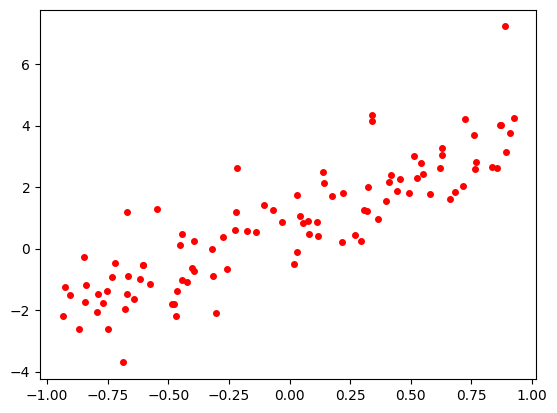

In [22]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

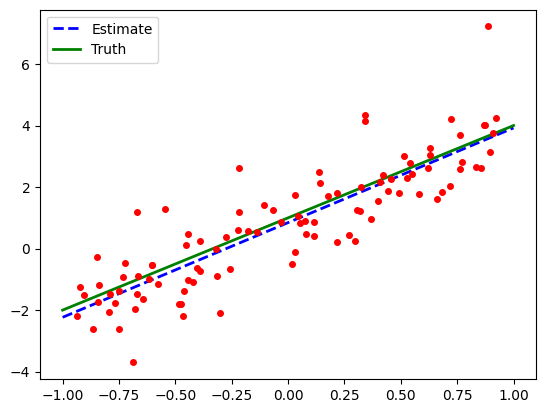

In [23]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

very close to the true values

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

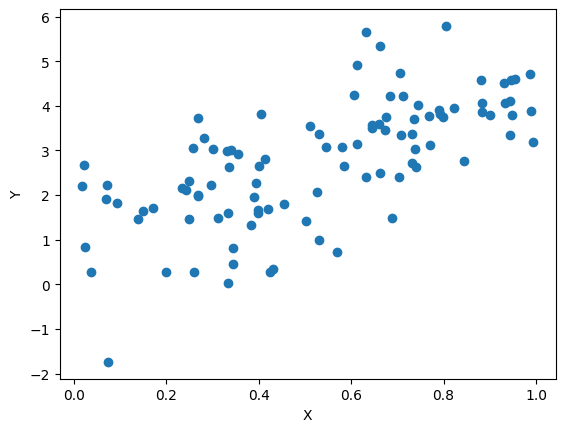

In [24]:
x = np.random.rand(100, 1)
eps = np.random.randn(100, 1)

y = 1 + 3 * x + 0.5 * x**2 + eps

# Plot the data
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

e) Plot the least squares estimate line through the scatter plot.

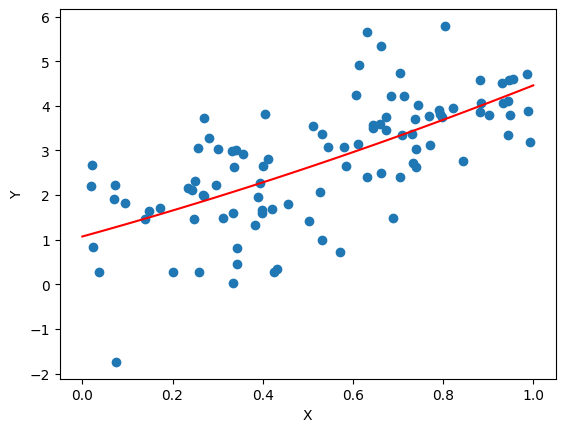

In [25]:
X = np.hstack([np.ones_like(x), x, x**2])
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

# Plot the data
plt.scatter(x, y)

# Plot the least squares estimate line
x_plot = np.linspace(0, 1, 100)[:, None]
X_plot = np.hstack([np.ones_like(x_plot), x_plot, x_plot**2])
y_plot = X_plot @ beta_hat
plt.plot(x_plot, y_plot, 'r')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

very close to the true values

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

In [26]:
n_iter = 100


beta_diffs = []


for i in range(n_iter):

    x = np.random.rand(100, 1)
    eps = np.random.randn(100, 1)
    y = 1 + 3 * x + 0.5 * x**2 + eps

    X = np.hstack([np.ones_like(x), x, x**2])
    beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

    # Calculate true values of beta
    beta_true = np.array([1, 3, 0.5])

    # Calculate difference between estimated and true values of beta
    beta_diff = beta_hat - beta_true
    beta_diffs.append(beta_diff)


beta_diffs = np.array(beta_diffs)

# Print mean and standard deviation of beta differences
print('Mean of beta differences:', np.mean(beta_diffs, axis=0))
print('Standard deviation of beta differences:', np.std(beta_diffs, axis=0))

Mean of beta differences: [[ 0.03259831 -1.96740169  0.53259831]
 [ 1.91315239 -0.08684761  2.41315239]
 [-0.42804825 -2.42804825  0.07195175]]
Standard deviation of beta differences: [[0.32245337 0.32245337 0.32245337]
 [1.47439143 1.47439143 1.47439143]
 [1.40021076 1.40021076 1.40021076]]
